# **Problem Statement :**

You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.:

# **1.Data Jar**

In [588]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [589]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/historical_marketing_data.csv") #to read the csv file from googlr drive

## **1.1 Data Cleaning**

### **1.1.1 Structured Data**

In [590]:
#to check the structured data or not
print(df.shape)
df.head()

(45211, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


### **1.1.2 check and drop duplicates**

In [591]:
df.drop_duplicates(inplace=True)
df.shape

(45205, 11)

Here we removed the 6 duplicate rows from the dataframe

### **1.1.3 Feature by Feature Cleaning**

In [592]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

#### **1. age**

In [593]:
df.age.dtypes

dtype('int64')

In [594]:
df.age.isnull().sum()

0

In [595]:
df.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [596]:
# to detect the outliers
q1 = df.age.quantile(0.25)
q3 = df.age.quantile(0.75)
iqr = q3-q1 # inter quantile range
lower_threshold = q1 - (1.5 * iqr)
upper_threshold = q3 + (1.5 * iqr)
print(lower_threshold,upper_threshold)

10.5 70.5


In [597]:
(df.age>70).value_counts()

False    44718
True       487
Name: age, dtype: int64

In [598]:
df_age=pd.DataFrame(df.loc[df['age']>70,'y'])
df_age.groupby('y').value_counts()

y
no     269
yes    218
dtype: int64

Here above 70 age people's are  50 % chance to subscribing the loan, so here we will not treat the outliers.

#### **2.job**

In [599]:
df.job.dtypes

dtype('O')

In [600]:
df.job.isnull().sum()

0

In [601]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

##### **imputing unknown values from the job column based on the mode**

In [602]:
df_job_unknown=pd.DataFrame(df.loc[df['job']=='unknown','y'])
df_job_unknown.value_counts()

y  
no     254
yes     34
dtype: int64

In [603]:
df_common_unknown=pd.DataFrame(df.loc[(df['job']=='unknown' ) & (df['education_qual']=='unknown') & (df['call_type']=='unknown') & (df['prev_outcome']=='unknown')])
print(df_common_unknown.shape)
df_common_unknown.head(55)

(54, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
216,47,unknown,married,unknown,unknown,5,may,338,2,unknown,no
354,59,unknown,divorced,unknown,unknown,5,may,347,3,unknown,no
876,37,unknown,single,unknown,unknown,7,may,131,1,unknown,no
2046,57,unknown,married,unknown,unknown,12,may,836,4,unknown,no
2848,25,unknown,single,unknown,unknown,14,may,158,2,unknown,no
3513,55,unknown,married,unknown,unknown,15,may,73,5,unknown,no
3985,46,unknown,married,unknown,unknown,16,may,323,3,unknown,no
4750,38,unknown,married,unknown,unknown,20,may,37,13,unknown,no
6966,57,unknown,married,unknown,unknown,28,may,74,2,unknown,no


In above dataframe totally 4 columns have unknow values outof 10 , so we are decided to remove those rows

In [604]:
df.drop(df.loc[(df.job == 'unknown') & (df.education_qual == 'unknown') & (df.call_type == 'unknown') & (df.prev_outcome == 'unknown')].index,axis=0,inplace = True)

In [605]:
df_job_unknown=pd.DataFrame(df.loc[df.job == 'unknown'])
print(df_job_unknown.shape)
df_job_unknown.head(50)

(234, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
1072,29,unknown,single,primary,unknown,7,may,50,2,unknown,no
1292,41,unknown,single,primary,unknown,8,may,287,2,unknown,no
2723,58,unknown,divorced,secondary,unknown,13,may,166,2,unknown,no
2841,53,unknown,divorced,tertiary,unknown,14,may,243,1,unknown,no
3324,49,unknown,married,primary,unknown,15,may,520,2,unknown,yes
4008,55,unknown,married,tertiary,unknown,16,may,409,3,unknown,no
5692,35,unknown,divorced,primary,unknown,26,may,422,5,unknown,no
5939,41,unknown,married,primary,unknown,26,may,151,3,unknown,no
6163,37,unknown,single,secondary,unknown,27,may,142,1,unknown,no
6558,32,unknown,single,secondary,unknown,27,may,108,3,unknown,no


In [606]:
df_education_qual = df.loc[(df.education_qual == 'primary') & (df.age < 60)]
df_education_qual.job.value_counts()

blue-collar      3702
housemaid         566
retired           399
services          340
management        277
unemployed        251
admin.            203
entrepreneur      175
technician        151
self-employed     126
unknown            49
student            44
Name: job, dtype: int64

In [607]:
df.loc[(df.job == 'unknown') & (df.education_qual == 'primary') & (df.age < 60),'job'] = 'blue-collar'

In [608]:
df_education_qual = df.loc[(df.education_qual == 'secondary') & (df.age < 60)]
df_education_qual.job.value_counts()

blue-collar      5334
technician       5174
admin.           4158
services         3444
management       1087
unemployed        718
self-employed     567
retired           565
entrepreneur      532
student           508
housemaid         374
unknown            66
Name: job, dtype: int64

In [609]:
df.loc[(df.job == 'unknown') & (df.education_qual == 'secondary') & (df.age < 60),'job'] = 'blue-collar'

In [610]:
df_education_qual = df.loc[(df.education_qual == 'tertiary') & (df.age < 60)]
df_education_qual.job.value_counts()

management       7678
technician       1946
self-employed     809
entrepreneur      679
admin.            569
unemployed        287
student           223
services          199
retired           169
housemaid         165
blue-collar       148
unknown            33
Name: job, dtype: int64

In [611]:
df.loc[(df.job == 'unknown') & (df.education_qual == 'tertiary') & (df.age < 60),'job'] = 'management'

In [612]:
df.loc[(df.job == 'unknown')]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
11613,61,unknown,married,tertiary,unknown,19,jun,216,2,unknown,no
11839,60,unknown,married,primary,unknown,20,jun,459,3,unknown,no
12750,46,unknown,married,unknown,telephone,7,jul,41,9,unknown,no
13667,60,unknown,married,tertiary,unknown,9,jul,297,5,unknown,no
16128,44,unknown,married,unknown,telephone,22,jul,269,2,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
44656,63,unknown,married,secondary,telephone,2,sep,173,1,failure,no
44742,64,unknown,married,unknown,telephone,9,sep,378,4,unknown,no
44970,28,unknown,single,unknown,cellular,11,oct,450,1,success,yes
45141,77,unknown,married,unknown,telephone,8,nov,207,1,success,no


In [613]:
df_education_qual = df.loc[(df.age > 60)]
df_education_qual.job.value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [614]:
df.loc[(df.job == 'unknown') & (df.age >= 60),'job'] = 'retired'

In [615]:
print(df.loc[(df.job == 'unknown')].shape)
df.loc[(df.job == 'unknown')]

(59, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
12750,46,unknown,married,unknown,telephone,7,jul,41,9,unknown,no
16128,44,unknown,married,unknown,telephone,22,jul,269,2,unknown,no
17704,51,unknown,married,unknown,cellular,29,jul,52,6,unknown,no
17739,45,unknown,married,unknown,telephone,29,jul,77,35,unknown,no
17845,56,unknown,married,unknown,telephone,29,jul,225,4,unknown,no
17922,48,unknown,married,unknown,cellular,30,jul,166,2,unknown,no
18079,41,unknown,married,unknown,cellular,30,jul,647,10,unknown,no
18519,56,unknown,married,unknown,telephone,31,jul,26,15,unknown,no
18593,44,unknown,married,unknown,telephone,31,jul,444,6,unknown,no
18844,50,unknown,married,unknown,cellular,4,aug,157,1,unknown,no


In [616]:
df.loc[df.mon == 'aug'].job.value_counts()

management       1985
technician       1818
blue-collar       634
retired           396
admin.            361
services          267
housemaid         261
self-employed     213
student           110
unemployed         93
entrepreneur       82
unknown            25
Name: job, dtype: int64

In [617]:
df.loc[df.mon == 'jul'].job.value_counts()

blue-collar      1410
management       1353
technician       1051
admin.            871
services          776
retired           343
entrepreneur      302
housemaid         282
self-employed     247
unemployed        177
student            72
unknown            10
Name: job, dtype: int64

In [618]:
df.loc[(df.job == 'unknown') & (df.mon == 'aug') ,'job'] = 'management'
df.loc[(df.job == 'unknown') & (df.mon == 'jul') ,'job'] = 'blue-collar'

In [619]:
print(df.loc[(df.job == 'unknown')].shape)
df.loc[(df.job == 'unknown')]

(24, 11)


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
25748,30,unknown,single,unknown,cellular,19,nov,341,1,unknown,no
27158,39,unknown,single,unknown,cellular,21,nov,573,3,unknown,no
27734,53,unknown,married,unknown,telephone,28,jan,69,1,unknown,no
27844,39,unknown,single,unknown,telephone,28,jan,28,1,unknown,no
27927,43,unknown,single,unknown,telephone,28,jan,41,1,unknown,no
28075,53,unknown,married,unknown,telephone,28,jan,74,2,unknown,no
29533,45,unknown,married,unknown,cellular,3,feb,419,3,unknown,no
29602,46,unknown,married,unknown,cellular,3,feb,425,1,failure,no
31536,58,unknown,married,unknown,cellular,2,apr,268,1,unknown,yes
33720,45,unknown,divorced,unknown,cellular,21,apr,278,3,unknown,yes


In [620]:
df.job.value_counts()

blue-collar      9855
management       9515
technician       7596
admin.           5170
services         4153
retired          2291
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown            24
Name: job, dtype: int64

In [621]:
df.loc[(df.age>40)  & (df.age<60) , ('job')].value_counts()

blue-collar      4317
management       3939
technician       2910
admin.           1995
services         1565
retired          1134
entrepreneur      767
housemaid         740
self-employed     664
unemployed        606
unknown            19
student            10
Name: job, dtype: int64

In [622]:
df.loc[df.job == 'unknown','job'] = 'blue-collar'

In [623]:
df.loc[df.job == 'unknown']

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y


In [624]:
df.job.value_counts()

blue-collar      9879
management       9515
technician       7596
admin.           5170
services         4153
retired          2291
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

#### **3. marital**

In [625]:
df.marital.dtypes

dtype('O')

In [626]:
df.marital.isnull().sum()

0

In [627]:
df.marital.value_counts()

married     27172
single      12776
divorced     5203
Name: marital, dtype: int64

In [628]:
df.loc[df.marital == 'single','y' ].value_counts()

no     10864
yes     1912
Name: y, dtype: int64

In [629]:
df.loc[df.marital == 'married','y' ].value_counts()

no     24418
yes     2754
Name: y, dtype: int64

#### **4. education_qual**

In [630]:
df.education_qual.dtypes

dtype('O')

In [631]:
df.education_qual.isnull().sum()

0

In [632]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1803
Name: education_qual, dtype: int64

##### **computing unknown values from the education_qual column by using mode**

In [633]:
df.loc[df.education_qual == 'unknown'].y.value_counts()

no     1552
yes     251
Name: y, dtype: int64

In [634]:
df.loc[df.education_qual == 'unknown']

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
13,58,technician,married,unknown,unknown,5,may,71,1,unknown,no
16,45,admin.,single,unknown,unknown,5,may,98,1,unknown,no
42,60,blue-collar,married,unknown,unknown,5,may,22,1,unknown,no
44,58,retired,married,unknown,unknown,5,may,616,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45129,46,technician,married,unknown,cellular,27,oct,171,1,success,yes
45141,77,retired,married,unknown,telephone,8,nov,207,1,success,no
45150,65,management,married,unknown,cellular,8,nov,354,3,success,no
45158,34,student,single,unknown,cellular,9,nov,600,2,failure,no


In [635]:
df.loc[(df.education_qual == 'unknown')].job.value_counts()

blue-collar      488
management       267
technician       242
admin.           171
student          163
services         150
retired          133
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: job, dtype: int64

In [636]:
df.loc[(df.job == 'blue-collar')].education_qual.value_counts()

secondary    5436
primary      3806
unknown       488
tertiary      149
Name: education_qual, dtype: int64

In [637]:
df.loc[(df.job == 'management')].education_qual.value_counts()

tertiary     7833
secondary    1121
primary       294
unknown       267
Name: education_qual, dtype: int64

In [638]:
df.loc[(df.job == 'technician')].education_qual.value_counts()

secondary    5229
tertiary     1967
unknown       242
primary       158
Name: education_qual, dtype: int64

In [639]:
df.loc[(df.job == 'self-employed')].education_qual.value_counts()

tertiary     833
secondary    577
primary      130
unknown       39
Name: education_qual, dtype: int64

In [640]:
df.loc[(df.education_qual == 'unknown') & (df.job == 'blue-collar'),'education_qual'] = 'primary'
df.loc[(df.education_qual == 'unknown') & (df.job == 'management'),'education_qual'] = 'tertiary'
df.loc[(df.education_qual == 'unknown') & (df.job == 'technician'),'education_qual'] = 'secondary'
df.loc[(df.education_qual == 'unknown') & (df.job.isin(['admin.','student','services','retired','unemployed'])),'education_qual'] = 'secondary'
df.loc[(df.education_qual == 'unknown') & (df.job == 'housemaid'),'education_qual'] = 'primary'
df.loc[(df.education_qual == 'unknown') & (df.job.isin(['entrepreneur','self-employed'])),'education_qual'] = 'tertiary'

In [641]:
df.loc[(df.education_qual == 'unknown')]

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y


#### **5. call_type**

In [642]:
df.call_type.dtypes

dtype('O')

In [643]:
df.call_type.isnull().sum()

0

In [644]:
df.loc[df.call_type == "telephone" ].y.value_counts()

no     2516
yes     390
Name: y, dtype: int64

In [645]:
df.call_type.value_counts()

cellular     29282
unknown      12963
telephone     2906
Name: call_type, dtype: int64

In [646]:
(12963 / df.shape[0]) * 100

28.710327567495735

approximately 30% percentage of the data's are unknow values, if we computing the value means the general pattern of the dataset may be change. and also the call_type column also not important, because the company anyway call via mobile only. Hence we can drop the call_type column

In [647]:
del df['call_type']

#### **6. day**

In [648]:
df.day.dtypes

dtype('int64')

In [649]:
df.day.isnull().sum()

0

In [650]:
df.day.describe()

count    45151.000000
mean        15.809484
std          8.323846
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [651]:
# to check the outliers
q1 = df.day.quantile(0.25)
q3 = df.day.quantile(0.75)
iqr = q3-q1 #inter quantile range
lower_threshold = q1 - (1.5 * iqr)
upper_threshold = q3 + (1.5 * iqr)
print(lower_threshold,upper_threshold)

-11.5 40.5


#### **7. mon**

In [652]:
df.mon.dtypes

dtype('O')

In [653]:
df.mon.isnull().sum()

0

In [654]:
df.mon.value_counts()

may    13754
jul     6894
aug     6245
jun     5298
nov     3969
apr     2932
feb     2649
jan     1403
oct      737
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [655]:
df.loc[df.mon == 'may'].y.value_counts()

no     12829
yes      925
Name: y, dtype: int64

In [656]:
df.loc[df.mon=='aug','y'].value_counts()

no     5557
yes     688
Name: y, dtype: int64

In [657]:
df.loc[df.mon=='jul','y'].value_counts()

no     6267
yes     627
Name: y, dtype: int64

#### **8.dur**

In [658]:
df.dur.dtypes

dtype('int64')

In [659]:
df.dur.isnull().sum()

0

In [660]:
df.dur.describe()

count    45151.000000
mean       258.244225
std        257.602899
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [661]:
q1 = df.dur.quantile(0.25)
q3 = df.dur.quantile(0.75)
iqr = q3-q1 #inter quantile range
lower_threshold = q1 - (1.5 * iqr)
upper_threshold = q3 + (1.5 * iqr)
print(lower_threshold,upper_threshold)

-221.0 643.0


In [662]:
(df.dur > 643.0).sum()

3233

In [663]:
df.loc[df.dur>643,'y'].value_counts()

yes    1651
no     1582
Name: y, dtype: int64

In [664]:
(3233 / df.shape[0]) * 100

7.160417266505725

some of the costmomers may take more time to convince for subscribing insurance, so here we are not treat the outliers

#### **9. num_calls**

In [665]:
df.num_calls.dtypes

dtype('int64')

In [666]:
df.num_calls.isnull().sum()

0

In [667]:
df.num_calls.describe()

count    45151.000000
mean         2.763571
std          3.098727
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [668]:
q1 = df.num_calls.quantile(0.25)
q3 = df.num_calls.quantile(0.75)
iqr = q3-q1 #inter quantile range
lower_threshold = q1 - (1.5 * iqr)
upper_threshold = q3 + (1.5 * iqr)
print(lower_threshold,upper_threshold)

-2.0 6.0


In [669]:
(df.num_calls > 6).sum()

3058

In [670]:
df.loc[df.num_calls > 6,'y'].value_counts()

no     2897
yes     161
Name: y, dtype: int64

In [671]:
(3058 / df.shape[0]) * 100

6.772828951739718

In genral reminding the cutomers also important, so here also we are not treating the outliers

#### **10.prev_outcome**

In [672]:
df.prev_outcome.dtypes

dtype('O')

In [673]:
df.prev_outcome.isnull().sum()

0

In [674]:
df.prev_outcome.value_counts()

unknown    36899
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [675]:
(36899 / df.shape[0]) * 100

81.72354986600519

so more than 80 % of the data's are unknown, so we will keep it as a one of the category or we need to remove that particular column. currently we are treating as sepearate category

## **1.2 EDA- Exploratory Data Analysis**

In [ ]:
df.groupby('mon')['y'].mean().sort_values().plot(kind='bar',label='Customers',color='g')
print(df.groupby('mon')['y'].mean())
plt.title(' mon vs y')
plt.xlabel(' mon')
plt.ylabel('y')
plt.legend()
plt.show()

In [718]:
age_order = df.groupby('y')['age'].mean().reset_index().sort_values('age')['y']
job_order = df.groupby('job')['y'].mean().reset_index().sort_values('y')['job']
marital_order = df.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital']
education_qual_order =  df.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual']
day_order =  df.groupby('day')['y'].mean().reset_index().sort_values('y')['day']
mon_order =  df.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon']
prev_outcome_order =  df.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome']

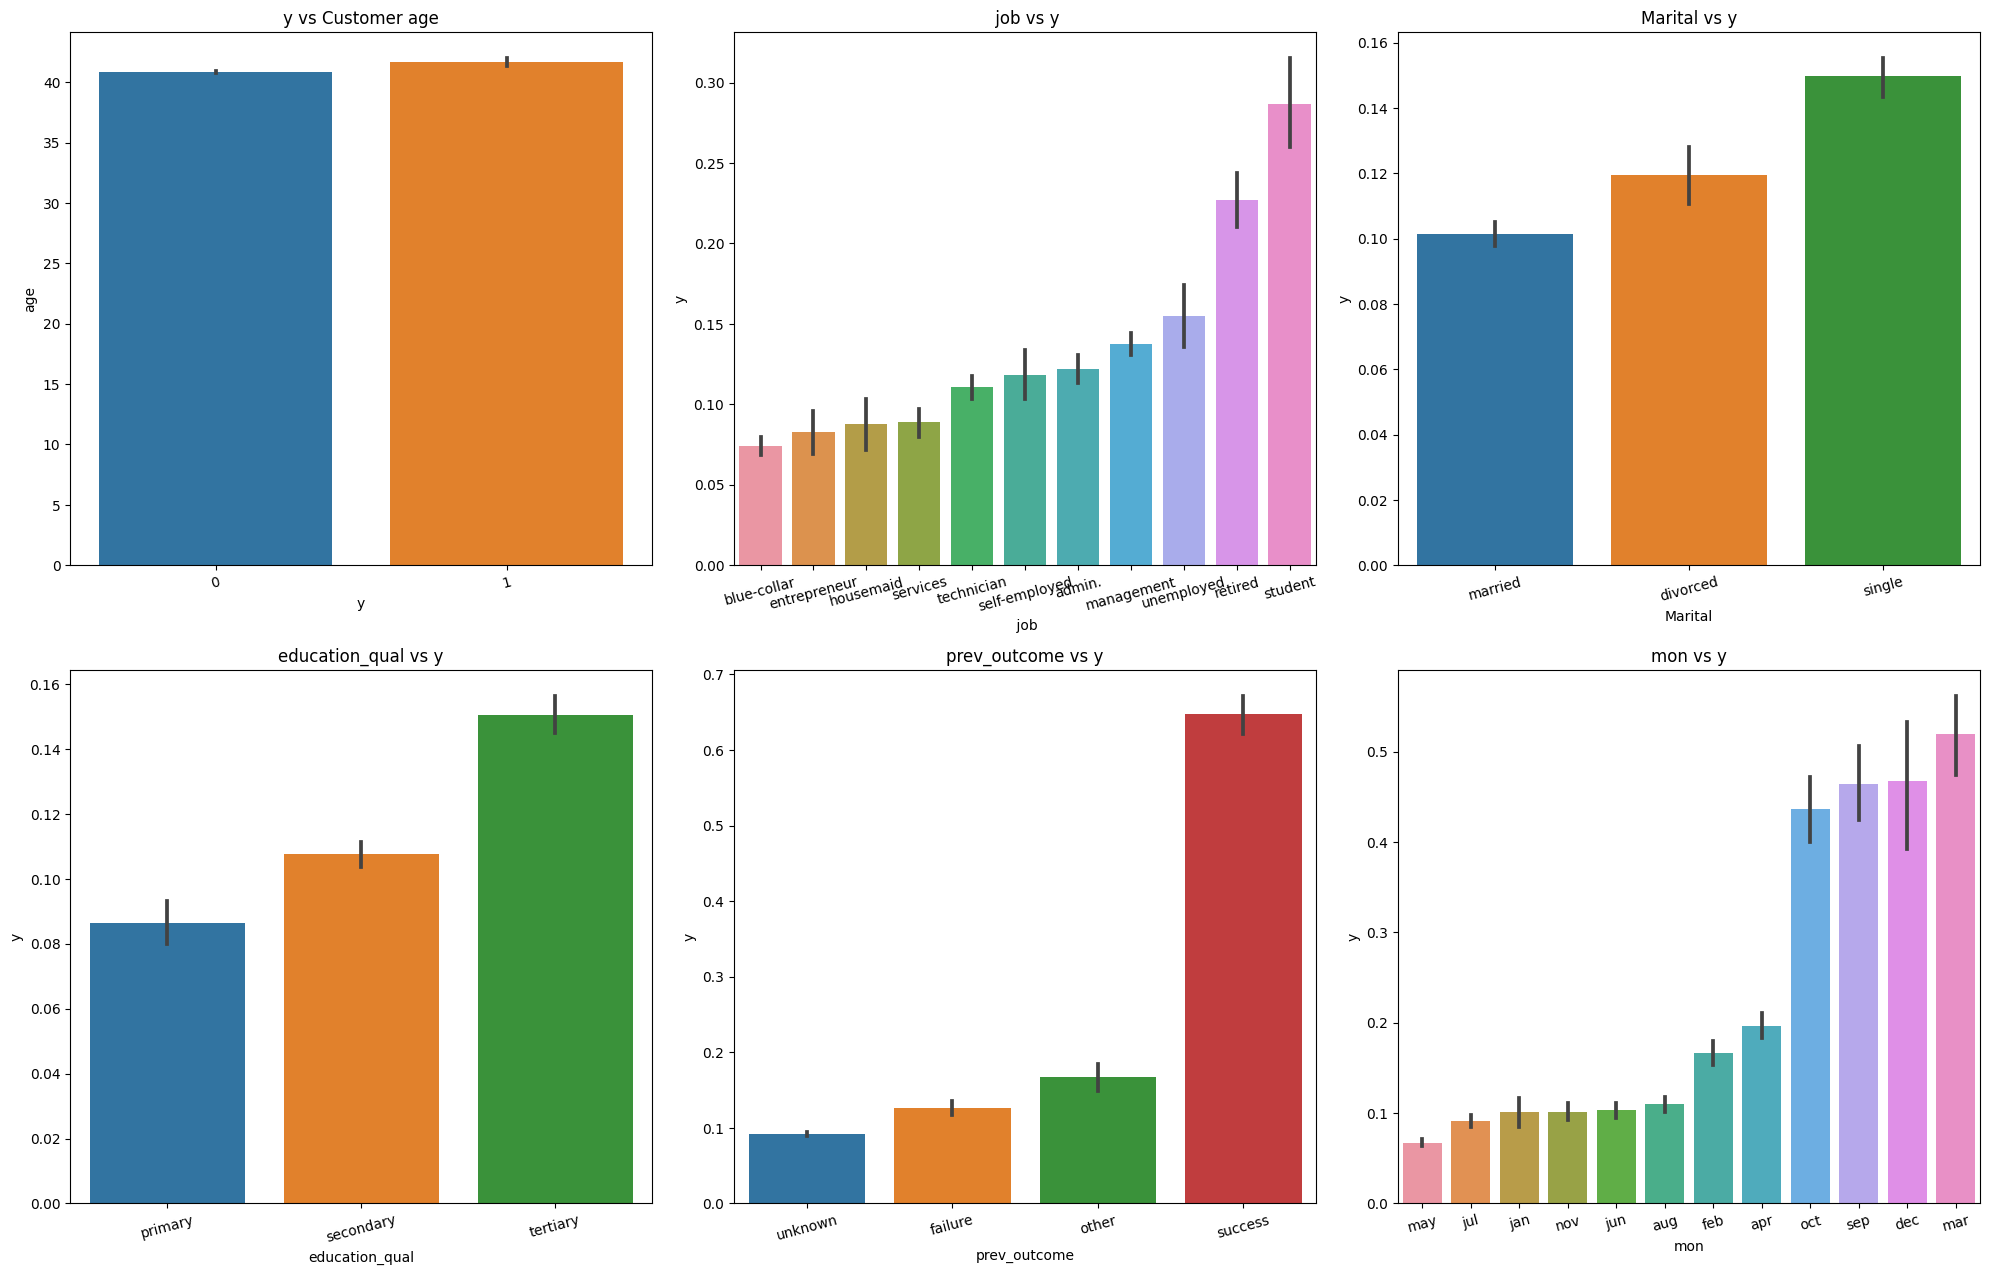

In [722]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(x=df['y'],y=df['age'],order = age_order)
plt.xticks(rotation=15)
plt.xlabel('y')
plt.ylabel('age')
plt.title('y vs Customer age')

plt.subplot(432)
sns.barplot(x=df['job'],y=df['y'],order = job_order)
plt.xticks(rotation=15)
plt.xlabel(' job')
plt.ylabel('y')
plt.title(' job vs y')

plt.subplot(433)
sns.barplot(x=df['marital'],y= df['y'], order = marital_order)
plt.xticks(rotation=15)
plt.xlabel('Marital')
plt.ylabel('y')
plt.title('Marital vs y')

plt.subplot(434)
sns.barplot(x=df['education_qual'],y=df['y'],order=education_qual_order)
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('y')
plt.title('education_qual vs y')

plt.subplot(436)
sns.barplot(x=df['mon'],y=df['y'],order=mon_order)
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('y')
plt.title('mon vs y')

plt.subplot(435)
sns.barplot(x=df['prev_outcome'],y=df['y'],order=prev_outcome_order)
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('y')
plt.title('prev_outcome vs y')

plt.tight_layout()

In [558]:
  df.drop_duplicates()
df.shape

(45151, 10)

In [559]:
df.reset_index(drop=True, inplace=True)

In [560]:
df

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,5,may,261,1,unknown,no
1,44,technician,single,secondary,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,5,may,76,1,unknown,no
3,47,blue-collar,married,primary,5,may,92,1,unknown,no
4,35,management,married,tertiary,5,may,139,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45146,51,technician,married,tertiary,17,nov,977,3,unknown,yes
45147,71,retired,divorced,primary,17,nov,456,2,unknown,yes
45148,72,retired,married,secondary,17,nov,1127,5,success,yes
45149,57,blue-collar,married,secondary,17,nov,508,4,unknown,no


In [561]:
# age --> Continuous Variable
# job --> Categorical Variable
# marital --> Categorical Variable
# day --> Categorical Variable
# mon --> Categorical Variable
# dur --> Continuous Variable
# num_calls --> Continuous Variable
# prev_outcome --> Categorical Variable

In [688]:
# converting target column categorical to continuous variable for plotting purpose
df.y=df.y.map({'yes':1,'no':0})

### **1. age**

<Axes: xlabel='y', ylabel='age'>

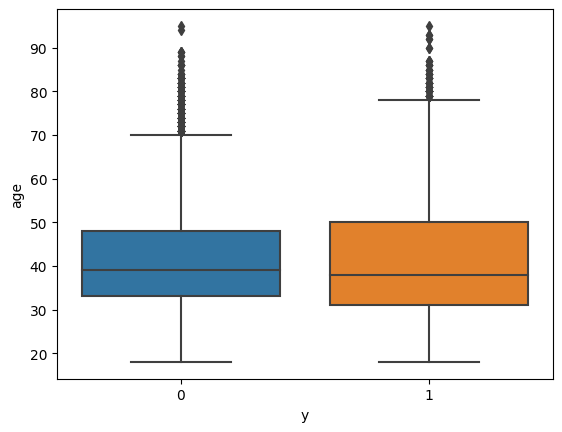

In [563]:
sns.boxplot(x = 'y', y ='age', data = df)
#df.age.isnull()

y
0    40.830494
1    41.667171
Name: age, dtype: float64


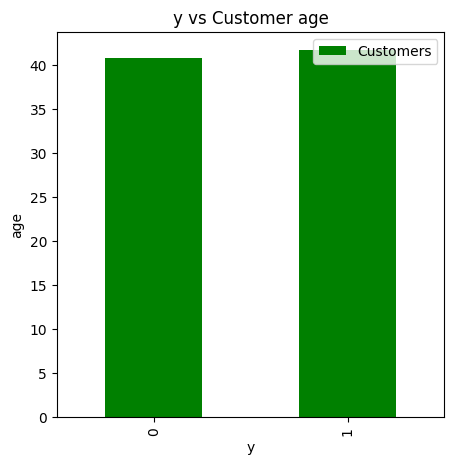

In [564]:
plt.figure(figsize=(5,5))
df.groupby('y')['age'].mean().sort_values().plot(kind='bar',color='g',label='Customers')
print(df.groupby('y')['age'].mean())
plt.title('y vs Customer age')
plt.xlabel('y')
plt.ylabel('age')
plt.legend()
plt.show()

Interpretation:
Chances of subscrbing insurance not changing much with the age, so age is not an important feature, So we can delete the age feature  

In [565]:
del df['age']

###**2. job**

job
admin.           0.122050
blue-collar      0.073995
entrepreneur     0.082717
housemaid        0.087903
management       0.137362
retired          0.226975
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: y, dtype: float64


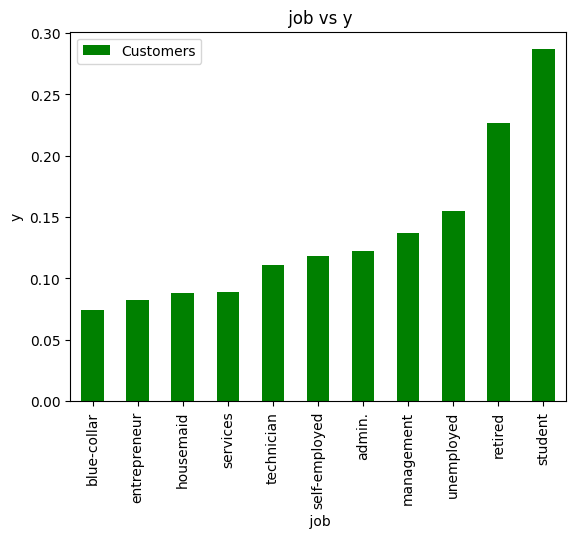

In [566]:
df.groupby('job')['y'].mean().sort_values().plot(kind='bar',label='Customers',color='g')
print(df.groupby('job')['y'].mean())
plt.title(' job vs y')
plt.xlabel(' job')
plt.ylabel('y')
plt.legend()
plt.show()

### **3. marital**

marital
divorced    0.119546
married     0.101354
single      0.149656
Name: y, dtype: float64


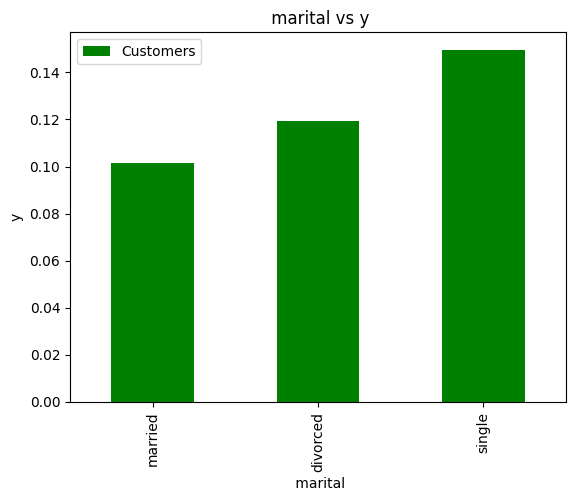

In [567]:
df.groupby('marital')['y'].mean().sort_values().plot(kind='bar',label='Customers',color='g')
print(df.groupby('marital')['y'].mean())
plt.title(' marital vs y')
plt.xlabel(' marital')
plt.ylabel('y')
plt.legend()
plt.show()

### **4. education_qual**

education_qual
primary      0.086550
secondary    0.107568
tertiary     0.150428
Name: y, dtype: float64


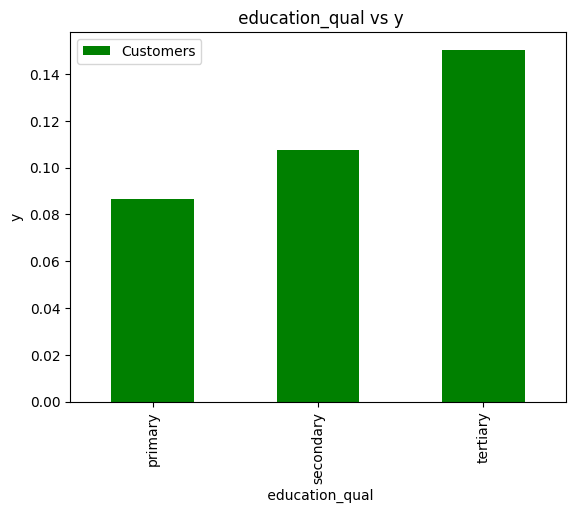

In [568]:
df.groupby('education_qual')['y'].mean().sort_values().plot(kind='bar',label='Customers',color='g')
print(df.groupby('education_qual')['y'].mean())
plt.title(' education_qual vs y')
plt.xlabel(' education_qual')
plt.ylabel('y')
plt.legend()
plt.show()

### **5. day**

day
1     0.279503
2     0.140867
3     0.164968
4     0.159170
5     0.113098
6     0.094026
7     0.086454
8     0.109239
9     0.114817
10    0.230916
11    0.122712
12    0.152500
13    0.152146
14    0.113698
15    0.139835
16    0.135881
17    0.090862
18    0.099044
19    0.069595
20    0.070022
21    0.099210
22    0.170166
23    0.133262
24    0.138702
25    0.158333
26    0.112077
27    0.133809
28    0.078228
29    0.073968
30    0.173052
31    0.071540
Name: y, dtype: float64


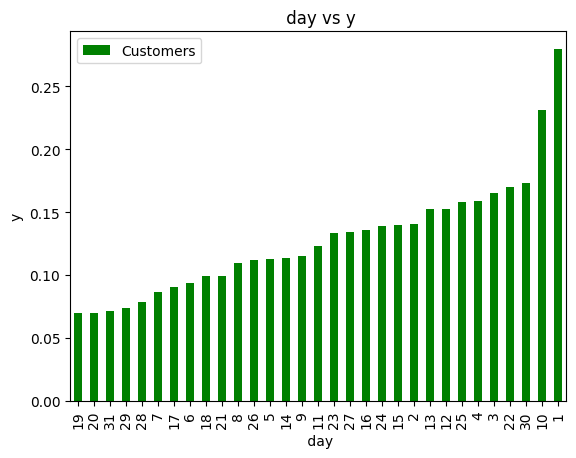

In [569]:
df.groupby('day')['y'].mean().sort_values().plot(kind='bar',label='Customers',color='g')
print(df.groupby('day')['y'].mean())
plt.title(' day vs y')
plt.xlabel(' day')
plt.ylabel('y')
plt.legend()
plt.show()

### **6.mon**

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.103058
mar    0.519916
may    0.067253
nov    0.101537
oct    0.436906
sep    0.464594
Name: y, dtype: float64


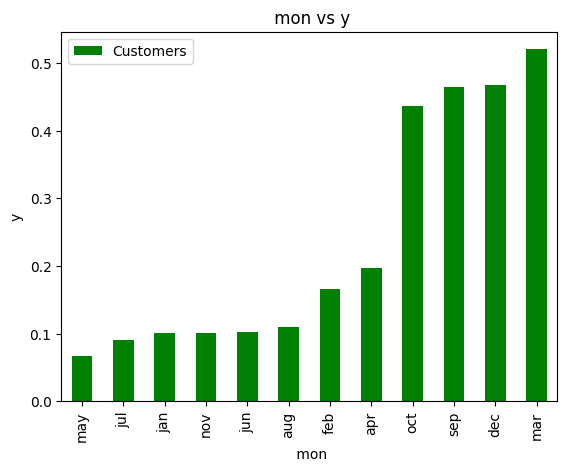

In [570]:
df.groupby('mon')['y'].mean().sort_values().plot(kind='bar',label='Customers',color='g')
print(df.groupby('mon')['y'].mean())
plt.title(' mon vs y')
plt.xlabel(' mon')
plt.ylabel('y')
plt.legend()
plt.show()

### **7. dur**

y
0    221.221057
1    537.339259
Name: dur, dtype: float64


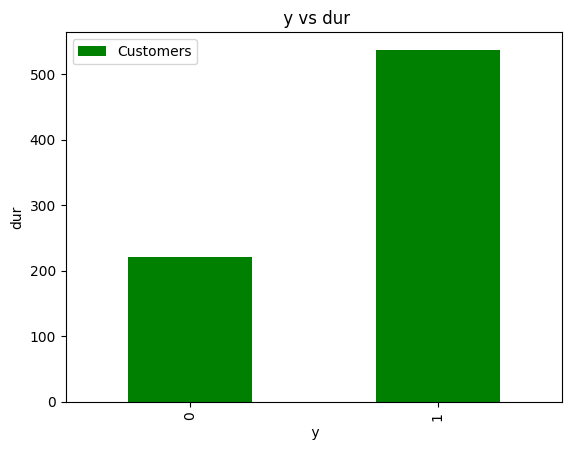

In [571]:
df.groupby('y')['dur'].mean().sort_values().plot(kind='bar',label='Customers',color='g')
print(df.groupby('y')['dur'].mean())
plt.title(' y vs dur')
plt.xlabel(' y')
plt.ylabel('dur')
plt.legend()
plt.show()

### **8.num_calls**

y
0    2.846123
1    2.141263
Name: num_calls, dtype: float64


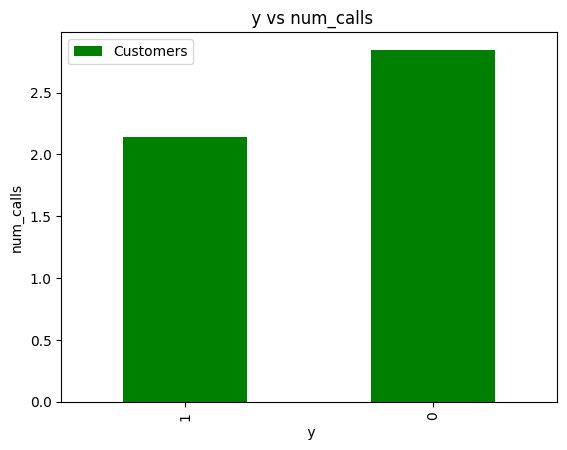

In [572]:
df.groupby('y')['num_calls'].mean().sort_values().plot(kind='bar',label='Customers',color='g')
print(df.groupby('y')['num_calls'].mean())
plt.title(' y vs num_calls')
plt.xlabel(' y')
plt.ylabel('num_calls')
plt.legend()
plt.show()

### **9.prev_outcome**

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091737
Name: y, dtype: float64


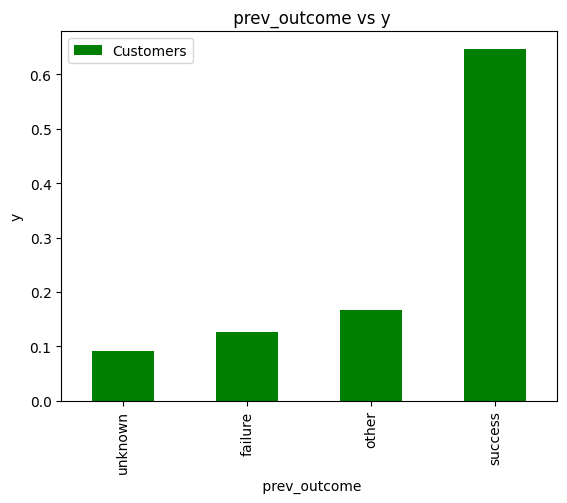

In [573]:
df.groupby('prev_outcome')['y'].mean().sort_values().plot(kind='bar',label='Customers',color='g')
print(df.groupby('prev_outcome')['y'].mean())
plt.title(' prev_outcome vs y')
plt.xlabel(' prev_outcome')
plt.ylabel('y')
plt.legend()
plt.show()

## **1.3 Encoding**

In [574]:
# age --> Continuous Variable
# job --> Categorical Variable
# marital --> Categorical Variable
# day --> Categorical Variable
# mon --> Categorical Variable
# dur --> Continuous Variable
# num_calls --> Continuous Variable
# prev_outcome --> Continuous Variable

In [575]:
df.columns

Index(['job', 'marital', 'education_qual', 'day', 'mon', 'dur', 'num_calls',
       'prev_outcome', 'y'],
      dtype='object')

In [576]:
df.dtypes

job               object
marital           object
education_qual    object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

In [577]:
df.job.value_counts()

blue-collar      9879
management       9515
technician       7596
admin.           5170
services         4153
retired          2291
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [578]:
job_dummies=pd.get_dummies(df.job)
mon_dummies=pd.get_dummies(df.mon)
pre_outcome_dummies = pd.get_dummies(df.prev_outcome)

In [579]:
df = pd.concat([df,job_dummies,mon_dummies,pre_outcome_dummies],axis = 'columns')
df.head()

,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y,admin.,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,management,married,tertiary,5,may,261,1,unknown,0,0,...,0,0,1,0,0,0,0,0,0,1
1,technician,single,secondary,5,may,151,1,unknown,0,0,...,0,0,1,0,0,0,0,0,0,1
2,entrepreneur,married,secondary,5,may,76,1,unknown,0,0,...,0,0,1,0,0,0,0,0,0,1
3,blue-collar,married,primary,5,may,92,1,unknown,0,0,...,0,0,1,0,0,0,0,0,0,1
4,management,married,tertiary,5,may,139,1,unknown,0,0,...,0,0,1,0,0,0,0,0,0,1


In [580]:
df = df.drop(['job', 'mon', 'prev_outcome','admin.','mar','unknown'],axis = 'columns')
df.head()

,marital,education_qual,day,dur,num_calls,y,blue-collar,entrepreneur,housemaid,management,...,jan,jul,jun,may,nov,oct,sep,failure,other,success
0,married,tertiary,5,261,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,single,secondary,5,151,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,married,secondary,5,76,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,married,primary,5,92,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,married,tertiary,5,139,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [581]:
#df['job']=df['job'].map({'student':10,'retired':9,'unemployed':8,'management':7,'admin.':6,'self-employed':5,'technician':4,'housemaid':3,'services':2,'entrepreneur':1,'blue-collar':0})
df['marital']=df['marital'].map({'single':2,'divorced':1,'married':0})
df['education_qual']= df['education_qual'].map({'tertiary':2,'secondary':1,'primary':0})
#df['mon']=df['mon'].map({'mar':11,'dec':10,'sep':9,'oct':8,'apr':7,'feb':6,'aug':5,'jun':4,'jan':3,'nov':2,'jul':1,'may':0})
#df['prev_outcome']=df['prev_outcome'].map({'success':3,'other':2,'failure': 1,'unknown':0})

In [582]:
df.head(5)

,marital,education_qual,day,dur,num_calls,y,blue-collar,entrepreneur,housemaid,management,...,jan,jul,jun,may,nov,oct,sep,failure,other,success
0,0,2,5,261,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,1,5,151,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,5,76,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,5,92,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,5,139,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## **1.4 spliting**

In [583]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='y').values
y=df.y.values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## **1.5 balanced Data ?**

In [584]:
pd.Series(y_train).value_counts() / pd.Series(y_train).shape[0]

0    0.883638
1    0.116362
dtype: float64

In [585]:
from imblearn.combine import SMOTEENN #import the SMOTEENN

smt = SMOTEENN(sampling_strategy = 'all') #initialize the SMOTEENN
x_train, y_train = smt.fit_resample(x_train, y_train)

In [456]:
pd.Series(y_train).value_counts() / pd.Series(y_train).shape[0]

1    0.611485
0    0.388515
dtype: float64

## **1.6 scaling**

In [457]:
from sklearn.preprocessing import StandardScaler #import StandardScaler funtion
scaler =StandardScaler() #Initialize StandardScaler funtion
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **2.Task jar**

Labled data-Supervised learning-binary classification-so we can use logistic regression, knn, decision tree, random forest, xg boost

# **3,4,5 Model jar,loss jar,learning jar**

### **1. Logistic Regression**

In [458]:
from sklearn.linear_model import LogisticRegression #import the LogisticRegression
from sklearn.model_selection import cross_val_score
LR = LogisticRegression()  #initialize the LogisticRegression
LR.fit(x_train_scaled,y_train)

LogisticRegression()

In [459]:
cross_val_LR = cross_val_score(LR,x_train_scaled,y_train,cv=10).mean()
cross_val_LR

0.945325424452068

In [460]:
y_pred = LR.predict(x_test)

In [461]:
from sklearn.metrics import accuracy_score,f1_score

In [462]:
f1_score(y_test,y_pred)

0.21453287197231835

## **2.K Nearest Neighbor Classification**

### **2.1 Choosing the best value of K**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #import the KNeighborsClassifier

for k in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    knn_classifier = KNeighborsClassifier(k) #initialize the KNeighborsClassifier
    knn_classifier.fit(x_train_scaled,y_train)
    print('k value :', k, 'training_score :', knn_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score(knn_classifier,x_train_scaled,y_train,cv=10).mean())

### **2.2 Implementing K Nearest Neighbor Classification**

In [465]:
knn_classifier = KNeighborsClassifier(1) #initialize the KNeighborsClassifier
knn_classifier.fit(x_train_scaled,y_train)
print('k value :', 1, 'training_score :', knn_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score(knn_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 1 training_score : 1.0 cv_score : 0.937354217976675


In [ ]:
cross_val_knn_classifier=cross_val_score(knn_classifier,x_train_scaled,y_train,cv=10).mean()
cross_val_knn_classifier

0.9373950396646699

##**3. Decision Tree**

### **3.1 Choosing the best of depth Value**

In [ ]:
from sklearn.tree import DecisionTreeClassifier #import the decisiontreeclassifier

for depth in [1,2,3,4,5,6,7,8,9,10,20,26,27,28,29,30,31,32,33,34,35,40,50,51]:
  dt_classifier = DecisionTreeClassifier(max_depth=depth)
  dt_classifier.fit(x_train_scaled,y_train)
  print('k value :', depth, 'Training_Accuracy :', dt_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score (dt_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 1 Training_Accuracy : 0.7888213897326284 cv_score : 0.7882024017108493
k value : 2 Training_Accuracy : 0.8037649529380883 cv_score : 0.8025835873740984
k value : 3 Training_Accuracy : 0.8530768365395432 cv_score : 0.8525519944265356
k value : 4 Training_Accuracy : 0.8736828289646379 cv_score : 0.8725577793775214
k value : 5 Training_Accuracy : 0.888326395920051 cv_score : 0.8844826212774407
k value : 6 Training_Accuracy : 0.8969512881088987 cv_score : 0.8946261932428146
k value : 7 Training_Accuracy : 0.9083511456106799 cv_score : 0.9033824175315793
k value : 8 Training_Accuracy : 0.9176510293621329 cv_score : 0.9120823742428783
k value : 9 Training_Accuracy : 0.9288821389732629 cv_score : 0.9208199352448281
k value : 10 Training_Accuracy : 0.9407507406157423 cv_score : 0.9274572841342517
k value : 20 Training_Accuracy : 0.9989875126560918 cv_score : 0.9535572562149026
k value : 26 Training_Accuracy : 1.0 cv_score : 0.9544385437194437
k value : 27 Training_Accuracy : 1.0 cv_s

### **3.2 Implementing Decision Tree Classifier**

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=34)
dt_classifier.fit(x_train_scaled,y_train)
print('k value :', 34, 'Training_Accuracy :', dt_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score (dt_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 34 Training_Accuracy : 1.0 cv_score : 0.9542697726256935


In [ ]:
cross_val_dt_classifier= cross_val_score (dt_classifier,x_train_scaled,y_train,cv=10).mean()
cross_val_dt_classifier

0.9540823030910749

## **4.Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score,accuracy_score
model = VotingClassifier(estimators = [('logistic_regression', LR),('k-nn', knn_classifier),('decision-tree', dt_classifier)])
model.fit(x_train_scaled, y_train)
f'Test data accuracy is : {model.score(x_test_scaled, y_test)}, {f1_score(y_test, model.predict(x_test_scaled))} '

'Test data accuracy is : 0.8078839552651976, 0.5086377796658171 '

## **5.Random Forest Classifier**

### **5.1 Choosing the best depth value**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,12,15,20,30,40,50]:
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(x_train_scaled, y_train)
  train_score = rf.score(x_train_scaled, y_train)
  cross_val_result = np.mean(cross_val_score(rf, x_train_scaled, y_train, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.8226647166910414 and cross-val score : 0.8159147285006775
Depth : 2, training score : 0.8396145048186898 and cross-val score : 0.8473390842551956
Depth : 3, training score : 0.8726703416207298 and cross-val score : 0.8719391629580897
Depth : 4, training score : 0.891251359358008 and cross-val score : 0.8848389568217531
Depth : 5, training score : 0.9031387107661154 and cross-val score : 0.8996138397569983
Depth : 6, training score : 0.9098136273296584 and cross-val score : 0.9071136124860448
Depth : 7, training score : 0.9173322833464582 and cross-val score : 0.9129262261962239
Depth : 8, training score : 0.9233884576442795 and cross-val score : 0.9191135012586205
Depth : 9, training score : 0.9318633517081036 and cross-val score : 0.9256947653716547
Depth : 10, training score : 0.9400569992875089 and cross-val score : 0.931319775961813
Depth : 12, training score : 0.9574192822589718 and cross-val score : 0.9424571494942281
Depth : 15, training score : 0.9

### **5.2 Implementing Random Forest Regression**

In [ ]:
rf = RandomForestClassifier(max_depth = 40)
rf.fit(x_train_scaled, y_train)
f'Test data accuracy is : {rf.score(x_test_scaled, y_test)}, {f1_score(y_test, rf.predict(x_test_scaled))}'

NameError: ignored

In [ ]:
cross_val_rf_classifier = np.mean(cross_val_score(rf, x_train_scaled, y_train, cv = 10))

## **6.Extreme Gradient Boosting Classifier**

### **6.1 Choosing the best Learning Rate**

In [ ]:
import xgboost as xgb
for lr in [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(x_train_scaled, y_train)
  train_score = xg.score(x_train_scaled, y_train)
  cross_val_result = np.mean(cross_val_score(xg, x_train_scaled, y_train, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

### **6.2 Implementing Extreme Gradient Boosting Classifier**

In [ ]:
xg = xgb.XGBClassifier(learning_rate=1)
xg.fit(x_train_scaled, y_train)
f'Test data accuracy is : {xg.score(x_test_scaled, y_test)}, {f1_score(y_test, xg.predict(x_test_scaled))}'

'Test data accuracy is : 0.8102092791495958, 0.48927294398092963 '

In [ ]:
cross_val_xgb_classifier= np.mean(cross_val_score(xg, x_train_scaled, y_train, cv = 10))

## **7 Cross-Validation Score for Machine-Learning Models**

In [ ]:
print("Cross Validation Score for Logistic Regression Model:",cross_val_LR)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_classifier)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_classifier)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_classifier)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_classifier)

Cross Validation Score for Logistic Regression Model: 0.8870138361431616
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.9373950396646699
Cross Validation Score for Decision Tree Regression Model:  0.9540823030910749
Cross Validation Score for Random Forest Regression Model:  0.9640758199805937
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9700382567498769


# **6.Evaluation Metrics jar**

## **6.1 accuracy & fl_score for all Machine-Learning Models**

In [ ]:
from sklearn.metrics import accuracy_score,f1_score

In [466]:
y_pred_lr=LR.predict(x_test_scaled)
y_pred_knn=knn_classifier.predict(x_test_scaled)
y_pred_dt= dt_classifier.predict(x_test_scaled)
y_pred_rf=rf.predict(x_test_scaled)
y_pred_xgb=xg.predict(x_test_scaled)

In [467]:
LR_score= accuracy_score(y_test,y_pred_lr),f1_score(y_test,y_pred_lr)
knn_score= accuracy_score(y_test,y_pred_knn),f1_score(y_test,y_pred_knn)
dt_score=accuracy_score(y_test,y_pred_dt),f1_score(y_test,y_pred_dt)
rf_score=accuracy_score(y_test,y_pred_rf),f1_score(y_test,y_pred_rf)
xg_score=accuracy_score(y_test,y_pred_xgb),f1_score(y_test,y_pred_xgb)

In [468]:
print("accuracy & f1_score for Logistic Regression Model :",LR_score)
print("accuracy & f1_score for K-Nearest Neighbors Regression Model :",knn_score)
print("accuracy & f1_score for Decision Tree Regression Model :",dt_score)
print("accuracy & f1_score for Random Forest Regression Model :",rf_score)
print("accuracy & f1_score for Extreme-Gradient Boosting Regression Model :",xg_score)

accuracy & f1_score for Logistic Regression Model : (0.8366736795482228, 0.5127188635612818)
accuracy & f1_score for K-Nearest Neighbors Regression Model : (0.8409921381906765, 0.4893314366998578)


In [ ]:
df.columns

Index(['job', 'marital', 'education_qual', 'day', 'mon', 'dur', 'num_calls',
       'prev_outcome', 'y'],
      dtype='object')

In [ ]:
# df['job']=df['job'].map({'student':10,'retired':9,'unemployed':8,'management':7,'admin.':6,'self-employed':5,'technician':4,'housemaid':3,'services':2,'entrepreneur':1,'blue-collar':0})
# df['marital']=df['marital'].map({'single':2,'divorced':1,'married':0})
# df['education_qual']= df['education_qual'].map({'tertiary':2,'secondary':1,'primary':0})
# df['mon']=df['mon'].map({'mar':11,'dec':10,'sep':9,'oct':8,'apr':7,'feb':6,'aug':5,'jun':4,'jan':3,'nov':2,'jul':1,'may':0})
# df['prev_outcome']=df['prev_outcome'].map({'success':3,'other':2,'failure': 1,'unknown':0})

In [ ]:
test_data_pt = ['management', 'divorced', 'secondary', 5,'oct', 76, 6,'failure']
encoded_test = [7, 1, 1, 5, 8, 76, 6, 1]
y_pred_lr=LR.predict(scaler.transform(np.array([encoded_test])))
y_pred_knn=knn_classifier.predict(scaler.transform(np.array([encoded_test])))
y_pred_dt= dt_classifier.predict(scaler.transform(np.array([encoded_test])))
y_pred_rf=rf.predict(scaler.transform(np.array([encoded_test])))
y_pred_xgb=xg.predict(scaler.transform(np.array([encoded_test])))

print(y_pred_lr,y_pred_knn,y_pred_dt,y_pred_rf,y_pred_xgb)

[0] [0] [0] [0] [0]


# **7.Suggestion to Insuration Company-Solving problem statements based on Feature Importance**

In [ ]:
rf.feature_importances_

array([0.0688552 , 0.02180365, 0.01695038, 0.09876885, 0.13757887,
       0.54554987, 0.05869257, 0.05180061])

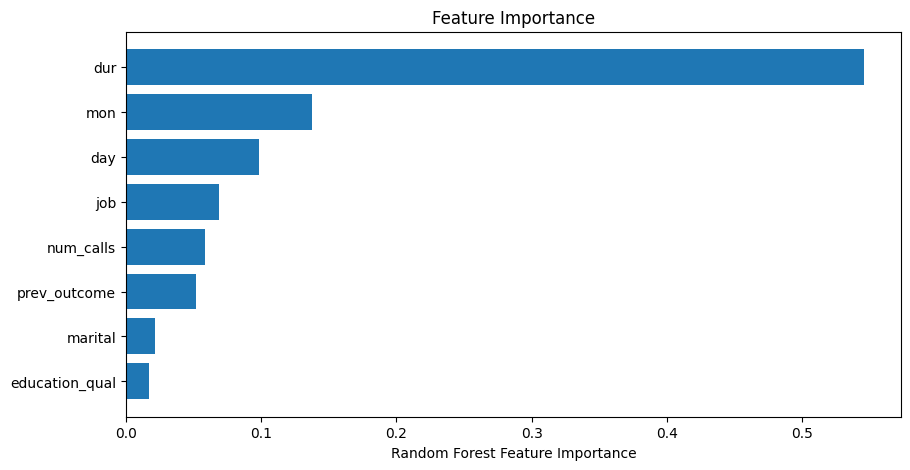

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
xg.feature_importances_

array([0.06689245, 0.03859209, 0.05324116, 0.07004463, 0.21933085,
       0.18663682, 0.10989614, 0.25536588], dtype=float32)

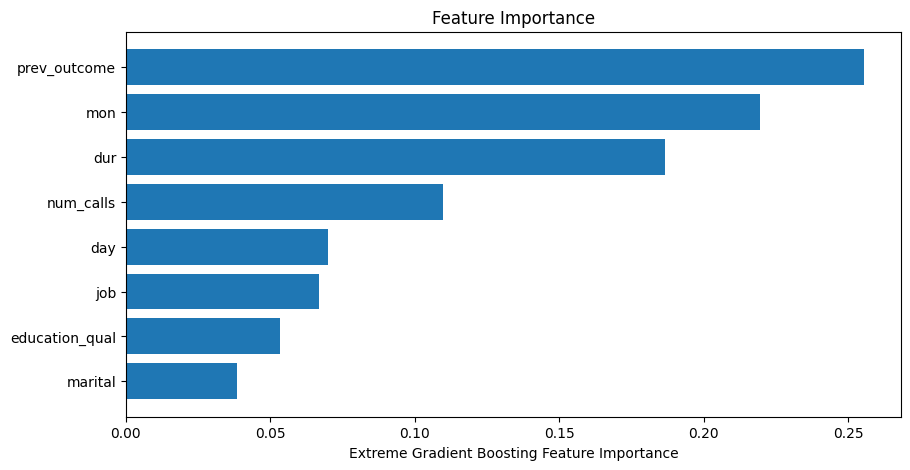

In [ ]:
sorted_idx = xg.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xg.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

## **suggestion to company**

Based on the feature importance given by Best Machine Learning Algorithm(Extreme Gradient Boosting)-Insurance Company should Focus on the features of order given below to contact the customers we can increase the subscription count for the insurance ✉ :**bold text**

1. duration for contact custome
2. type of call
3. previous_outcome
4. month for contact customer
5.number of calls
6.day for contact customer
7.job of the customer
8.education_qualication
9.marital_status

